# Classification(Logistic Regression)

Logistic Regression, while it has regression in its name is an algorithm for solving classification problems, not regression problems.

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
titanic =pd.read_csv('titanic.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [28]:
titanic.tail()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
882,0,2,male,27.0,0,0,13.00
883,1,1,female,19.0,0,0,30.00
884,0,3,female,7.0,1,2,23.45
885,1,1,male,26.0,0,0,30.00
886,0,3,male,32.0,0,0,7.75


In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [30]:
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [31]:
titanic.isnull().sum()

Survived            0
Pclass              0
Sex                 0
Age                 0
Siblings/Spouses    0
Parents/Children    0
Fare                0
dtype: int64

In [32]:
titanic.sample(5)

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
107,0,3,male,38.0,0,0,7.8958
607,0,3,female,39.0,1,5,31.2750
632,1,2,female,28.0,0,0,13.0000
472,0,1,male,40.0,0,0,52.0000
520,1,1,female,44.0,0,1,57.9792


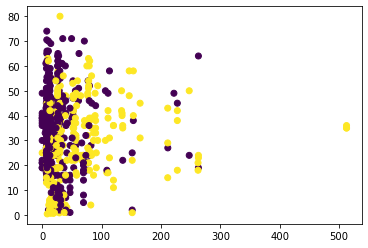

In [33]:
plt.scatter(titanic['Fare'], titanic['Age'], c=titanic['Survived'])

It is seen that there are more yellow dots at the bottom of the graph than the top. This is because children were more likely to survive than adults, which fits our intuition. Similarly there are more yellow dots on the right of the graph, meaning people that paid more were more likely to survive.

# A Linear Model for Classification

The task of a linear model is to find the line that best separates the two classes, so that the yellow points are on one side and the purple points are on the other.

Logistic Regression gives not just a prediction (survived or not), but a probability

The sigmoid function

In [34]:
#we need to make all our columns numerical. Creating a boolean column for Sex.
titanic['Male'] = titanic['Sex'] == 'male'

In [35]:
titanic.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


In [36]:
X = titanic[['Pclass', 'Male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X

array([[3, True, 22.0, 1, 0, 7.25],
       [1, False, 38.0, 1, 0, 71.2833],
       [3, False, 26.0, 0, 0, 7.925],
       ...,
       [3, False, 7.0, 1, 2, 23.45],
       [1, True, 26.0, 0, 0, 30.0],
       [3, True, 32.0, 0, 0, 7.75]], dtype=object)

In [37]:
Y = titanic['Survived'].values

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

x = titanic[['Fare', 'Age']].values
y = titanic['Survived']

model.fit(x,y)
print(model.coef_, model.intercept_)

[[ 0.01615949 -0.01549065]] [-0.51037152]


These values mean that the equation is as follows:

     0 = 0.0161594x + -0.01549065y + -0.51037152
     
Here’s the line drawn on the graph. You can see it does a decent (but not great) job of splitting the yellow and purple points. We’ve handicapped ourselves a bit by only using 2 of our features

In [40]:
y_pred = model.predict(x)
print(y_pred[:5])

[0 1 0 0 0]


In [41]:
print(y[:5])

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [42]:
# Getting the number of values that the model predicted correctly for whole dataset
y == y_pred
print((y == y_pred).sum())

580


In [43]:
model.score(x,y)

0.6538895152198422

The Model failed to predict two values correctly for the first five values 

We really handicapped the model by only using two of the features , we rebuild a model with all of features:

In [44]:
model_all = LogisticRegression()
model_all.fit(X,Y)
y_pred_all = model_all.predict(X)
print(y_pred_all[:5])

[0 1 1 1 0]


Taking whta the model predicts for the first 5 rows of data and compare it to our target array.
we see that the model scores all 5 correctly

In [45]:
new_passenger = np.array([[1, True, 40.0, 1, 0, 151.0]])
model_all.predict(new_passenger)

array([0], dtype=int64)

In [46]:
y == y_pred_all
print((y == y_pred_all).sum())

714


In [47]:
model_all.score(X,Y)

0.8049605411499436

# Logistic Regression with the Breast Cancer Dataset


In [2]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

We can see there are 30 features, 569 datapoints, and target is either Malignant (cancerous) or Benign (not cancerous). For each of the datapoints we have measurements of the breast mass (radius, texture, perimeter, etc.). For each of the 10 measurements, multiple values were computed, so we have the mean, standard error and the worst value. This results in 10 * 3 or 30 total features.

In the breast cancer dataset, there are several features that are calculated based on other columns. The process of figuring out what additional features to calculate is feature engineering.

In [6]:
#pulling the feature and target data out of the cancer_data object.
cancer_data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
cancer_data['data'].shape

(569, 30)

In [10]:
#We want the column names
#In order to put this in a Pandas DataFrame and make it more human readable

cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
cancer_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

We can see that the target is a 1-dimensional numpy array of 1’s and 0’s.

In [16]:
cancer_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

This gives the array ['malignant' 'benign'] which tells us that 0 means malignant and 1 means benign

In [23]:
cancer_data['target'].shape

(569,)

If we look at the shape of the array, we see that it’s a 1-dimensional array with 569 values

In [19]:
cancer_data['filename']

'C:\\Users\\Dell\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\breast_cancer.csv'

In [22]:
df = pd.DataFrame(cancer_data['data'], columns = cancer_data['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
#adding the target column

df['target'] = cancer_data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [53]:
#Building a Logistic Regression Model

x1 = df[cancer_data['feature_names']].values
y1 = df['target'].values

model2 = LogisticRegression(solver = 'liblinear')
model2.fit(x1, y1)

LogisticRegression(solver='liblinear')

In [55]:
#predicting the first datapoint in the cancer dataset

model2.predict([x1[0]])

array([0])

In [58]:
#model performance over the whole dataset(accuracy)

model2.score(x1, y1)

0.9595782073813708